In [4]:
import pandas as pd
PATH = "00_data/"

In [5]:
products = pd.read_csv(f"{PATH}olist_products_dataset.csv", encoding="utf-8-sig")
customers = pd.read_csv(f"{PATH}olist_customers_dataset.csv", encoding="utf-8-sig")
geolocation = pd.read_csv(f"{PATH}olist_geolocation_dataset.csv", encoding="utf-8-sig")
order_items = pd.read_csv(f"{PATH}olist_order_items_dataset.csv", encoding="utf-8-sig")
payments = pd.read_csv(f"{PATH}olist_order_payments_dataset.csv", encoding="utf-8-sig")
reviews = pd.read_csv(f"{PATH}olist_order_reviews_dataset.csv", encoding="utf-8-sig")
orders = pd.read_csv(f"{PATH}olist_orders_dataset.csv", encoding="utf-8-sig")
sellers = pd.read_csv(f"{PATH}olist_sellers_dataset.csv", encoding="utf-8-sig")
category_name = pd.read_csv(f"{PATH}product_category_name_translation.csv", encoding="utf-8-sig")

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers["customer_unique_id"]

0        861eff4711a542e4b93843c6dd7febb0
1        290c77bc529b7ac935b93aa66c333dc3
2        060e732b5b29e8181a18229c7b0b2b5e
3        259dac757896d24d7702b9acbbff3f3c
4        345ecd01c38d18a9036ed96c73b8d066
                       ...               
99436    1a29b476fee25c95fbafc67c5ac95cf8
99437    d52a67c98be1cf6a5c84435bd38d095d
99438    e9f50caf99f032f0bf3c55141f019d99
99439    73c2643a0a458b49f58cea58833b192e
99440    84732c5050c01db9b23e19ba39899398
Name: customer_unique_id, Length: 99441, dtype: object

In [5]:
# 컬럼에 중복되는 값이 존재 => 최대 17개까지 출력
# 사용자를 식별하기 위한 고유 ID

customers["customer_unique_id"].value_counts().max()

17

In [6]:
# 중복이 한 개도 없음
# 주문이 발생할 때마다 신규로 생성되는 고객 ID

customers["customer_id"].value_counts().max()

1

In [8]:
customers["customer_id"].nunique()

99441

In [9]:
customers["customer_unique_id"].nunique()

96096

In [10]:
# 지금까지 실제 구매한 고객 수 : 96,096명

In [11]:
# 2. 고객은 주로 어디에 거주하는가? : san paulo

In [12]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [23]:
customers_location = customers.groupby("customer_city")["customer_unique_id"].nunique().sort_values(ascending=False)

customers_location.head(20)

customer_city
sao paulo                14984
rio de janeiro            6620
belo horizonte            2672
brasilia                  2069
curitiba                  1465
campinas                  1398
porto alegre              1326
salvador                  1209
guarulhos                 1153
sao bernardo do campo      908
niteroi                    811
santo andre                769
osasco                     717
santos                     692
goiania                    671
sao jose dos campos        666
fortaleza                  643
sorocaba                   610
recife                     590
jundiai                    547
Name: customer_unique_id, dtype: int64

In [30]:
customers_location = customers_location.head(20)

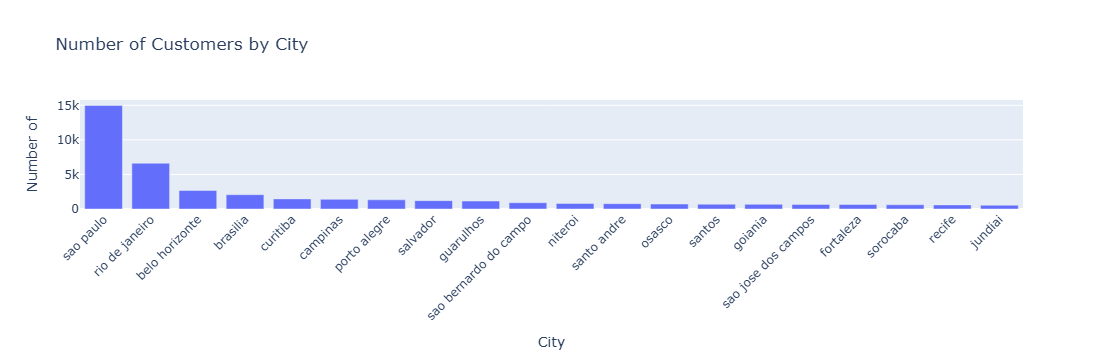

In [31]:
import plotly.express as px

fig = px.bar(
    x=customers_location.index,
    y=customers_location.values,
    title = "Number of Customers by City",
    labels = {"x":"City","y":"Number of "}
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [32]:
top20_customer_locations = customers_location.index
top20_customer_locations

Index(['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba',
       'campinas', 'porto alegre', 'salvador', 'guarulhos',
       'sao bernardo do campo', 'niteroi', 'santo andre', 'osasco', 'santos',
       'goiania', 'sao jose dos campos', 'fortaleza', 'sorocaba', 'recife',
       'jundiai'],
      dtype='object', name='customer_city')

In [34]:
for index, location in enumerate(top20_customer_locations) :
    print("TOP", index+1 , location)

TOP 1 sao paulo
TOP 2 rio de janeiro
TOP 3 belo horizonte
TOP 4 brasilia
TOP 5 curitiba
TOP 6 campinas
TOP 7 porto alegre
TOP 8 salvador
TOP 9 guarulhos
TOP 10 sao bernardo do campo
TOP 11 niteroi
TOP 12 santo andre
TOP 13 osasco
TOP 14 santos
TOP 15 goiania
TOP 16 sao jose dos campos
TOP 17 fortaleza
TOP 18 sorocaba
TOP 19 recife
TOP 20 jundiai


In [39]:
# 3. 고객은 주로 어떤 결제방법을 사용할까?

In [37]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [38]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [40]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [41]:
payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [44]:
payments = payments[payments["payment_type"] != 'not_defined']

In [45]:
payments["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [47]:
payment_type_count = payments.groupby("payment_type")["order_id"].nunique().sort_values(ascending=False)
payment_type_count

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
Name: order_id, dtype: int64

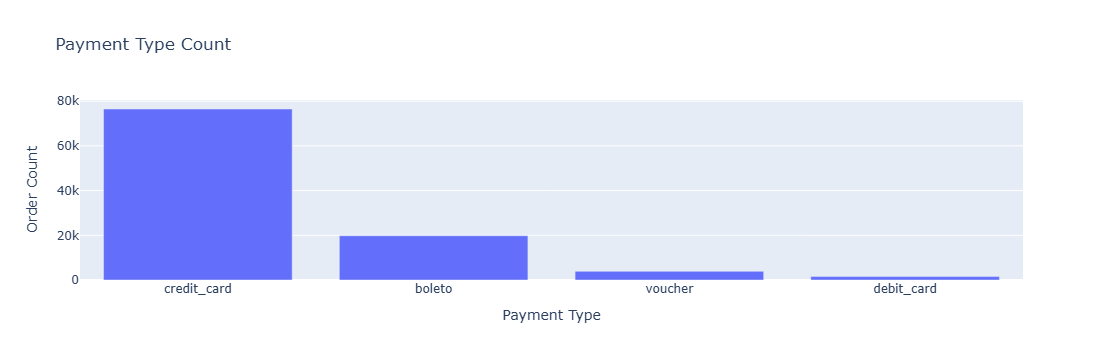

In [48]:
import plotly.express as px

fig = px.bar(
    x=payment_type_count.index,
    y=payment_type_count.values,
    title = "Payment Type Count",
    labels = {"x":"Payment Type","y":"Order Count "}
)

fig.show()

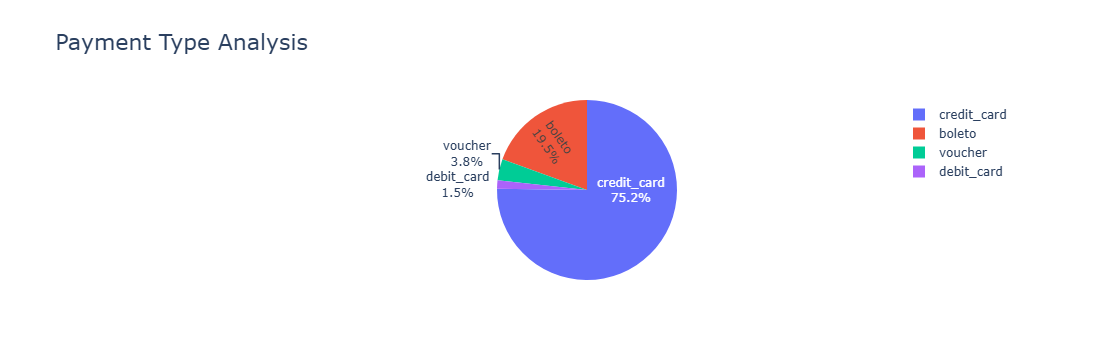

In [55]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels = payment_type_count.index,
        values = payment_type_count.values,
        textinfo = "label+percent",
        insidetextorientation = "radial"
    )
)

fig.update_layout({
    "title" : {
        "text":"Payment Type Analysis",
        "font":{
            "size":22
        }
    }
})

fig.show()

In [56]:
# 4. 월 평균 거래금액은 얼마일까?

In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [5]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [6]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
orders = orders.dropna()

In [8]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


In [10]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [68]:
orders["order_id"].value_counts().max()

1

In [69]:
payments["order_id"].value_counts().max()

29

In [11]:
payments = payments.groupby("order_id").sum()

In [78]:
payments

payment_sequential payment_type  \
order_id                                                            
00010242fe8c5a6d1ba2dd792cb16214                   1  credit_card   
00018f77f2f0320c557190d7a144bdd3                   1  credit_card   
000229ec398224ef6ca0657da4fc703e                   1  credit_card   
00024acbcdf0a6daa1e931b038114c75                   1  credit_card   
00042b26cf59d7ce69dfabb4e55b4fd9                   1  credit_card   
...                                              ...          ...   
fffc94f6ce00a00581880bf54a75a037                   1       boleto   
fffcd46ef2263f404302a634eb57f7eb                   1       boleto   
fffce4705a9662cd70adb13d4a31832d                   1  credit_card   
fffe18544ffabc95dfada21779c9644f                   1  credit_card   
fffe41c64501cc87c801fd61db3f6244                   1  credit_card   

                                  payment_installments  payment_value  
order_id                                                               
00010242fe8c5a6d1ba2dd792cb16214                     2          72.19  
00018f77f2f0320c557190d7a144bdd3                     3         259.83  
000229ec398224ef6ca0657da4fc703e                     5         216.87  
00024acbcdf0a6daa1e931b038114c75                     2          25.78  
00042b26cf59d7ce69dfabb4e55b4fd9                     3         218.04  
...                                                ...            ...  
fffc94f6ce00a00581880bf54a75a037                     1         343.40  
fffcd46ef2263f404302a634eb57f7eb                     1         386.53  
fffce4705a9662cd70adb13d4a31832d                     3         116.85  
fffe18544ffabc95dfada21779c9644f                     3          64.71  
fffe41c64501cc87c801fd61db3f6244                     1          55.79  

[99437 rows x 4 columns]

In [12]:
payments[payments.index == "fa65dad1b0e818e3ccc5cb0e39231352"]

payment_sequential  \
order_id                                               
fa65dad1b0e818e3ccc5cb0e39231352                 435   

                                                                       payment_type  \
order_id                                                                              
fa65dad1b0e818e3ccc5cb0e39231352  vouchervouchervouchervouchervouchervouchervouc...   

                                  payment_installments  payment_value  
order_id                                                               
fa65dad1b0e818e3ccc5cb0e39231352                    29         457.99

In [83]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99437 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   payment_sequential    99437 non-null  int64  
 1   payment_type          99437 non-null  object 
 2   payment_installments  99437 non-null  int64  
 3   payment_value         99437 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [6]:
# merged_order = pd.merge(orders, payments, on="order_id", how = "left")
merged_order = pd.merge(orders, payments, on="order_id")

In [14]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96460 non-null  object 
 1   customer_id                    96460 non-null  object 
 2   order_status                   96460 non-null  object 
 3   order_purchase_timestamp       96460 non-null  object 
 4   order_approved_at              96460 non-null  object 
 5   order_delivered_carrier_date   96460 non-null  object 
 6   order_delivered_customer_date  96460 non-null  object 
 7   order_estimated_delivery_date  96460 non-null  object 
 8   payment_sequential             96460 non-null  int64  
 9   payment_type                   96460 non-null  object 
 10  payment_installments           96460 non-null  int64  
 11  payment_value                  96460 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usag

In [15]:
merged_order.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  payment_sequential  \
0           2017-10-18 00:00:00                   6   
1           2018-08-13 00:00:00                   1   
2           2018-09-04 00:00:00                   1   
3           2017-12-15 00:00:00                   1   
4           2018-02-26 00:00:00                   1   

                payment_type  payment_installments  payment_value  
0  credit_cardvouchervoucher                     3          38.71  
1                     boleto                     1         141.46  
2                credit_card                     3         179.12  
3                credit_card                     1          72.20  
4                credit_card                     1          28.62

In [16]:
# 현 데이터에서는 날짜가 특정한 기준에 따라 월별 정리되지 않은 상황
# 특정 월별 집합
# pandas에서는 날짜와 관련 타입 정의 -> 날짜타입을 사용할 수만 있다면, 해당 타입에서 쓸 수 있는 함수, 속성 => 특정 월별 집합

In [18]:
import pandas as pd

df = pd.DataFrame({"order":[
    "2020-01-01 07:10:00",
    "2020-01-08 07:20:00",
    "2020-02-20 11:20:00",
    "2020-02-20 04:40:50",
    "2020-02-28 12:10:20",
    "2019-01-01 17:23:50",
    "2020-06-20 22:27:50"
]})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   order   7 non-null      object
dtypes: object(1)
memory usage: 188.0+ bytes


In [ ]:
# 문자열 형태의 데이터타입 (object) -> 시간 타입 (datetime64)
# 2025-01-16 = 25-01-16 = 25-1-16
# time25"01'01 twentyfive,,,
# to_datetime(Series 변수 = order, format = , errors = )
# ignore : 무시, raise : 출력, coerce : NaT 결측치 값으로 변경 후 실행

%y : 연도를 축약해서 2자리로
%Y : 연도를 축약하지 않은 상태 4자리로
%m : 월을 2자리로
%d : 일을 2자리로
%H : 24시간을 기준 00~23
$M : 분을 2자리로
$S : 초를 2자리로

In [22]:
pd.to_datetime(df["order"], format="%Y-%m-%d %H:%M:%S", errors="raise")

0   2020-01-01 07:10:00
1   2020-01-08 07:20:00
2   2020-02-20 11:20:00
3   2020-02-20 04:40:50
4   2020-02-28 12:10:20
5   2019-01-01 17:23:50
6   2020-06-20 22:27:50
Name: order, dtype: datetime64[ns]

In [23]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96460 non-null  object 
 1   customer_id                    96460 non-null  object 
 2   order_status                   96460 non-null  object 
 3   order_purchase_timestamp       96460 non-null  object 
 4   order_approved_at              96460 non-null  object 
 5   order_delivered_carrier_date   96460 non-null  object 
 6   order_delivered_customer_date  96460 non-null  object 
 7   order_estimated_delivery_date  96460 non-null  object 
 8   payment_sequential             96460 non-null  int64  
 9   payment_type                   96460 non-null  object 
 10  payment_installments           96460 non-null  int64  
 11  payment_value                  96460 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usag

In [7]:
merged_order["order_purchase_timestamp"] = pd.to_datetime(merged_order["order_purchase_timestamp"], format="%Y-%m-%d %H:%M:%S", errors="raise")

In [25]:
merged_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96460 non-null  object        
 1   customer_id                    96460 non-null  object        
 2   order_status                   96460 non-null  object        
 3   order_purchase_timestamp       96460 non-null  datetime64[ns]
 4   order_approved_at              96460 non-null  object        
 5   order_delivered_carrier_date   96460 non-null  object        
 6   order_delivered_customer_date  96460 non-null  object        
 7   order_estimated_delivery_date  96460 non-null  object        
 8   payment_sequential             96460 non-null  int64         
 9   payment_type                   96460 non-null  object        
 10  payment_installments           96460 non-null  int64         
 11  payment_value  

In [8]:
merged_order_payment_date = merged_order[["order_purchase_timestamp", "payment_value"]].copy()

In [27]:
merged_order_payment_date

order_purchase_timestamp  payment_value
0          2017-10-02 10:56:33          38.71
1          2018-07-24 20:41:37         141.46
2          2018-08-08 08:38:49         179.12
3          2017-11-18 19:28:06          72.20
4          2018-02-13 21:18:39          28.62
...                        ...            ...
96455      2017-03-09 09:54:05          85.08
96456      2018-02-06 12:58:58         195.00
96457      2017-08-27 14:46:43         271.01
96458      2018-01-08 21:28:27         441.16
96459      2018-03-08 20:57:30          86.86

[96460 rows x 2 columns]

In [28]:
merged_order_payment_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  96460 non-null  datetime64[ns]
 1   payment_value             96460 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [29]:
merged_order_payment_date = merged_order_payment_date.set_index("order_purchase_timestamp")

In [30]:
merged_order_payment_date

payment_value
order_purchase_timestamp               
2017-10-02 10:56:33               38.71
2018-07-24 20:41:37              141.46
2018-08-08 08:38:49              179.12
2017-11-18 19:28:06               72.20
2018-02-13 21:18:39               28.62
...                                 ...
2017-03-09 09:54:05               85.08
2018-02-06 12:58:58              195.00
2017-08-27 14:46:43              271.01
2018-01-08 21:28:27              441.16
2018-03-08 20:57:30               86.86

[96460 rows x 1 columns]

In [31]:
# 일별 나눠져있는 날짜 -> 월별
# groupby (중복해서 작성된 요소를 하나의 그룹으로 합칠 수 있음)

In [32]:
# groupby > Grouper (*세부적으로 그룹의 조건 생성 적용)
# 데이터프레임.groupby(pd.Grouper(key="그룹화하려고하는 컬럼명", freq="세부기준"))

ME : 월간
QE : 분기
YE : 연간
D : 일일
h : 시간
min : 분당
S : 초당

In [39]:
merged_order_payment_date = merged_order_payment_date.reset_index()

In [40]:
merged_order_payment_date

order_purchase_timestamp  payment_value
0          2017-10-02 10:56:33          38.71
1          2018-07-24 20:41:37         141.46
2          2018-08-08 08:38:49         179.12
3          2017-11-18 19:28:06          72.20
4          2018-02-13 21:18:39          28.62
...                        ...            ...
96455      2017-03-09 09:54:05          85.08
96456      2018-02-06 12:58:58         195.00
96457      2017-08-27 14:46:43         271.01
96458      2018-01-08 21:28:27         441.16
96459      2018-03-08 20:57:30          86.86

[96460 rows x 2 columns]

In [43]:
merged_order_payment_month = merged_order_payment_date.groupby(pd.Grouper(key="order_purchase_timestamp",freq="ME")).sum()

In [46]:
merged_order_payment_month

payment_value
order_purchase_timestamp               
2016-10-31                     47271.20
2016-11-30                         0.00
2016-12-31                        19.62
2017-01-31                    127430.74
2017-02-28                    269458.98
2017-03-31                    414369.39
2017-04-30                    390952.18
2017-05-31                    566872.73
2017-06-30                    490225.60
2017-07-31                    566403.93
2017-08-31                    646000.61
2017-09-30                    700976.01
2017-10-31                    751140.27
2017-11-30                   1153393.22
2017-12-31                    843199.17
2018-01-31                   1078606.86
2018-02-28                    966554.97
2018-03-31                   1120678.00
2018-04-30                   1132933.95
2018-05-31                   1128836.69
2018-06-30                   1011561.35
2018-07-31                   1027383.10
2018-08-31                    985414.28

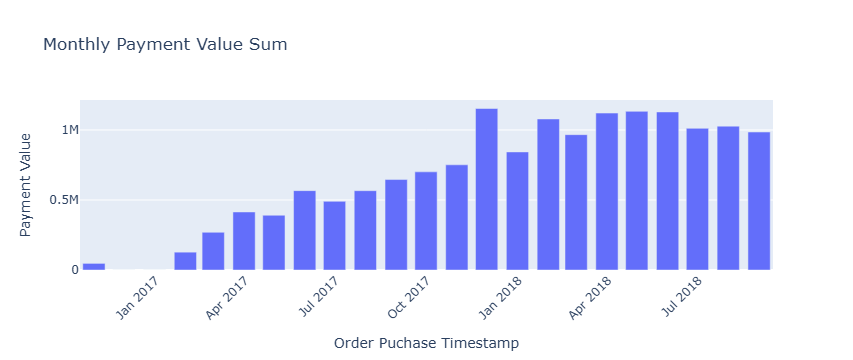

In [49]:
import plotly.express as px

fig = px.bar(
    x=merged_order_payment_month.index,
    y=merged_order_payment_month["payment_value"],
    title="Monthly Payment Value Sum",
    labels = {
        "x":"Order Puchase Timestamp",
        "y":"Payment Value"
    }
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [50]:
merged_order_payment_month["payment_value"].mean()

np.float64(670420.9934782608)

In [51]:
merged_order_payment_month["payment_value"]

order_purchase_timestamp
2016-10-31      47271.20
2016-11-30          0.00
2016-12-31         19.62
2017-01-31     127430.74
2017-02-28     269458.98
2017-03-31     414369.39
2017-04-30     390952.18
2017-05-31     566872.73
2017-06-30     490225.60
2017-07-31     566403.93
2017-08-31     646000.61
2017-09-30     700976.01
2017-10-31     751140.27
2017-11-30    1153393.22
2017-12-31     843199.17
2018-01-31    1078606.86
2018-02-28     966554.97
2018-03-31    1120678.00
2018-04-30    1132933.95
2018-05-31    1128836.69
2018-06-30    1011561.35
2018-07-31    1027383.10
2018-08-31     985414.28
Freq: ME, Name: payment_value, dtype: float64

In [53]:
merged_order_payment_month["payment_value"][3:].mean()

np.float64(768619.6014999999)

In [54]:
merged_order_payment_month[merged_order_payment_month["payment_value"] == merged_order_payment_month["payment_value"].max()]

payment_value
order_purchase_timestamp               
2017-11-30                   1153393.22

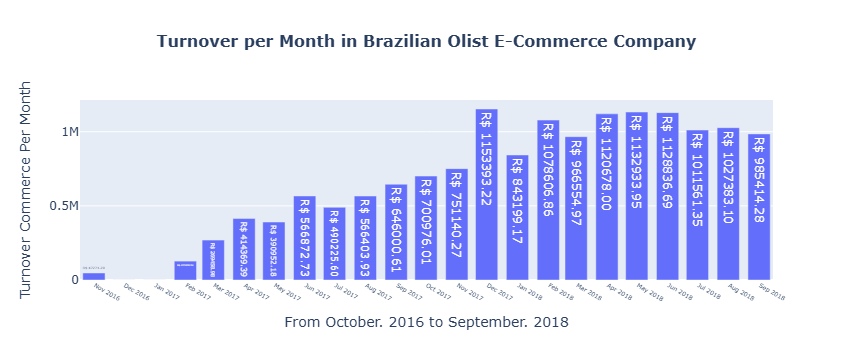

In [72]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month.index,
        y=merged_order_payment_month["payment_value"],
        text=merged_order_payment_month["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:.2f}"
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b>",
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From October. 2016 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        }
    }
)

fig.show()

In [73]:
merged_order_payment_month_from2017 = merged_order_payment_month[merged_order_payment_month.index >"2017-01-01"]

In [74]:
merged_order_payment_month_from2017

payment_value
order_purchase_timestamp               
2017-01-31                    127430.74
2017-02-28                    269458.98
2017-03-31                    414369.39
2017-04-30                    390952.18
2017-05-31                    566872.73
2017-06-30                    490225.60
2017-07-31                    566403.93
2017-08-31                    646000.61
2017-09-30                    700976.01
2017-10-31                    751140.27
2017-11-30                   1153393.22
2017-12-31                    843199.17
2018-01-31                   1078606.86
2018-02-28                    966554.97
2018-03-31                   1120678.00
2018-04-30                   1132933.95
2018-05-31                   1128836.69
2018-06-30                   1011561.35
2018-07-31                   1027383.10
2018-08-31                    985414.28

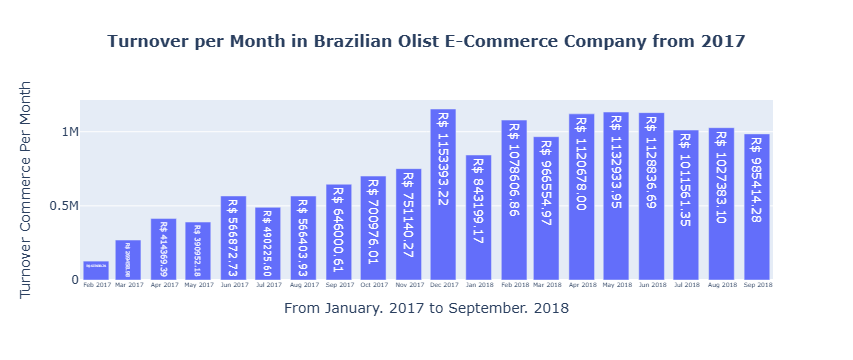

In [75]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month_from2017.index,
        y=merged_order_payment_month_from2017["payment_value"],
        text=merged_order_payment_month_from2017["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:.2f}"
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company from 2017</b>",
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From January. 2017 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        }
    }
)

fig.show()

In [76]:
import plotly.io as pio

pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

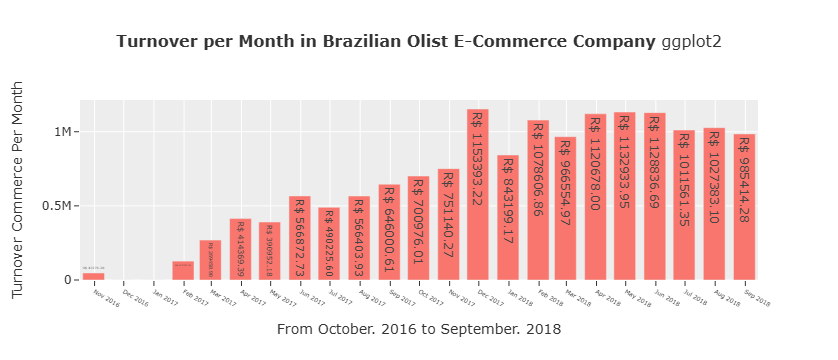

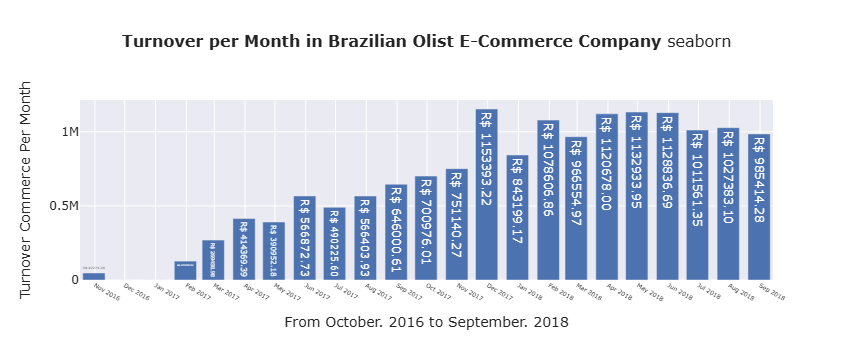

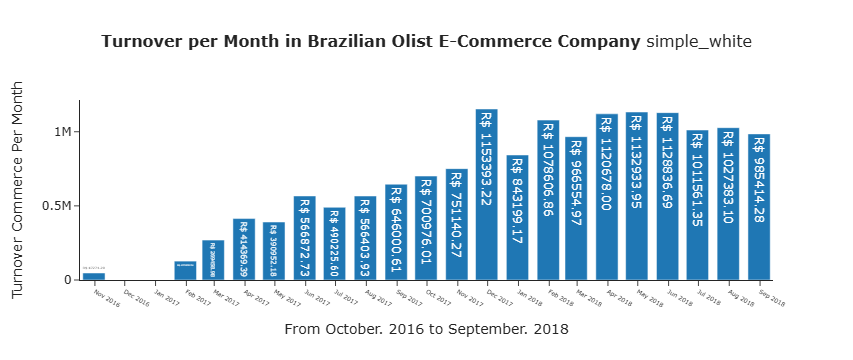

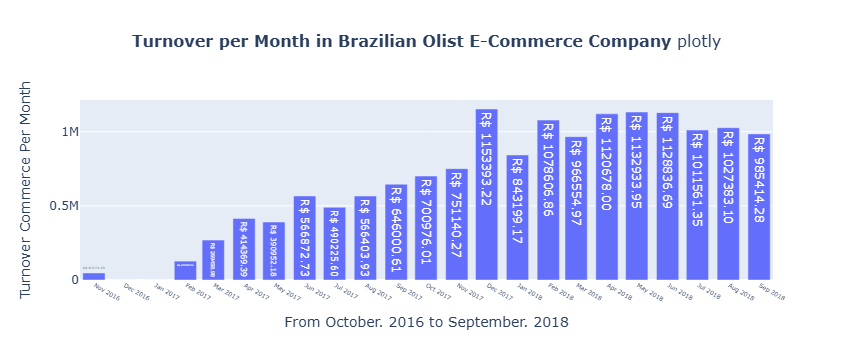

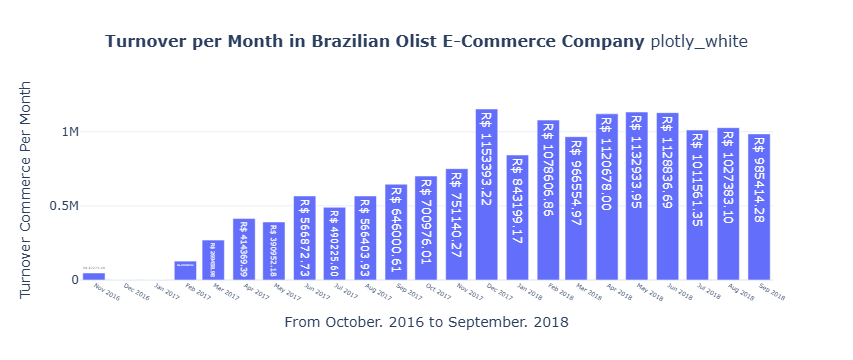

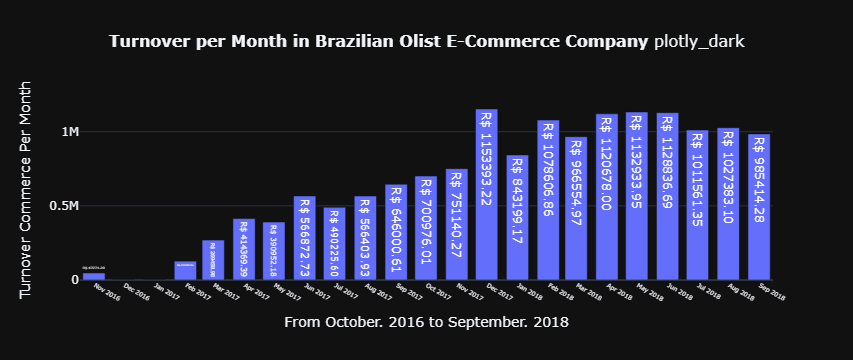

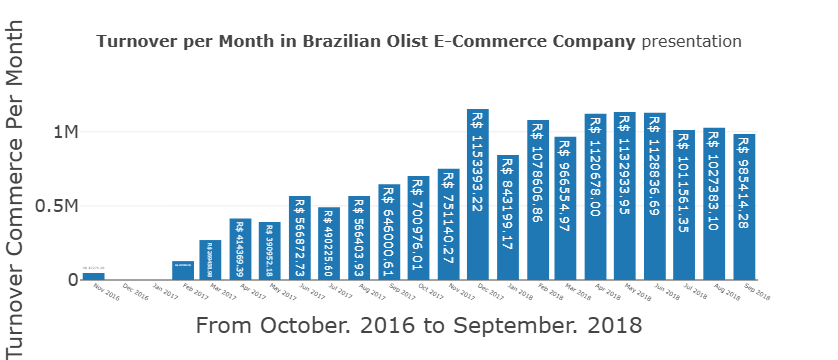

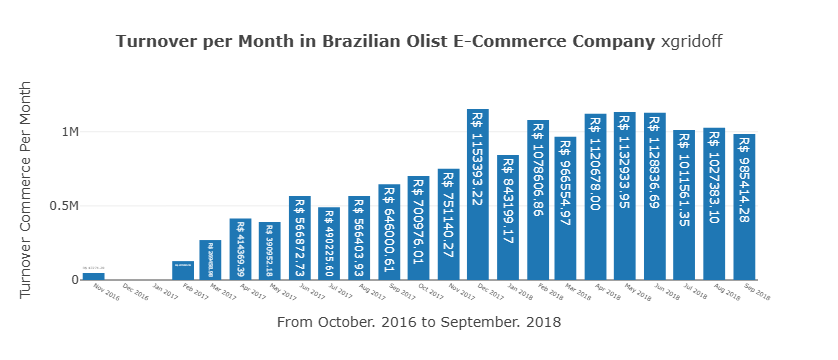

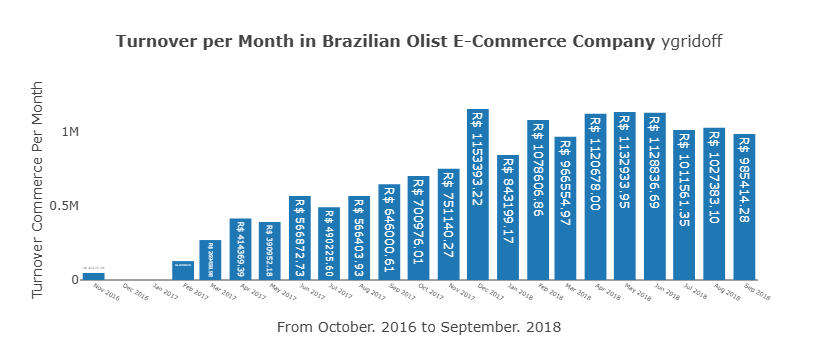

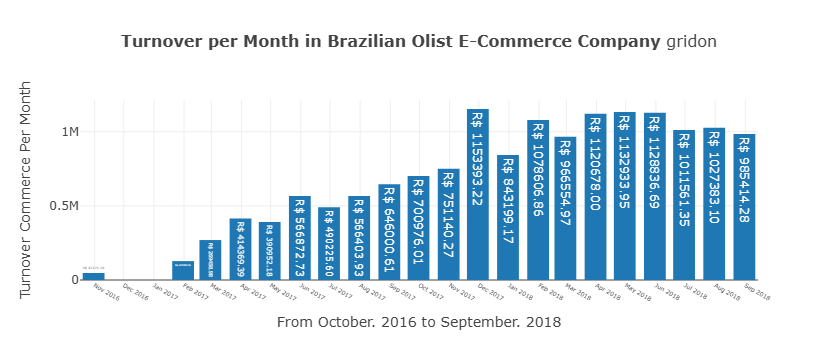

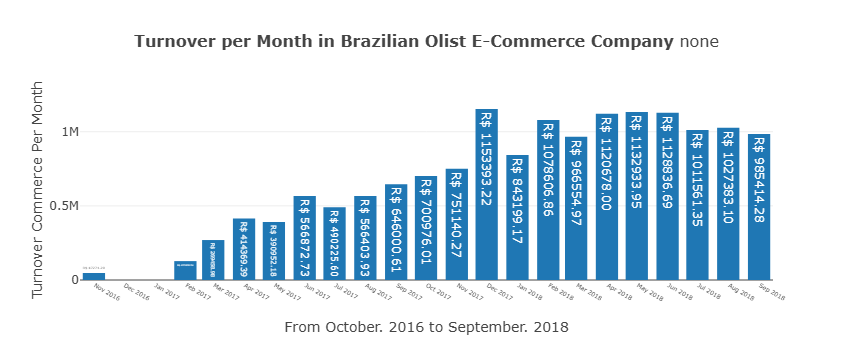

In [80]:
import plotly.graph_objects as go

for template in pio.templates :
    fig = go.Figure()
    
    fig.add_trace(
        go.Bar(
            x=merged_order_payment_month.index,
            y=merged_order_payment_month["payment_value"],
            text=merged_order_payment_month["payment_value"],
            textposition="auto",
            texttemplate="R$ %{y:.2f}"
        )
    )
    
    fig.update_layout(
        {
            # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
            "title":{
                "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b> " + template,
                "x":0.5,
                "y":0.9,
                "font": {
                    "size":16
                },
                    },
            "xaxis": {
                "title":"From October. 2016 to September. 2018",
                "showticklabels":True,
                "dtick":"M1",
                "tickfont":{
                    "size":6
                }
            },
            "yaxis": {
                "title" : "Turnover Commerce Per Month"
            },
            "template" : template
        }
    )

    fig.show()

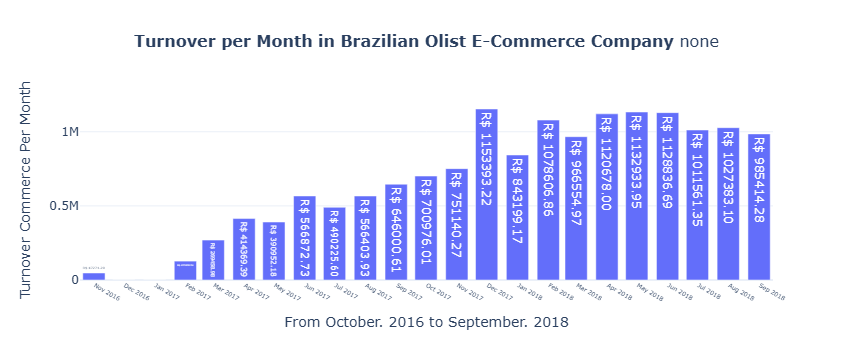

In [84]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month.index,
        y=merged_order_payment_month["payment_value"],
        text=merged_order_payment_month["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:.2f}"
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b> " + template,
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From October. 2016 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        },
        "template" : "plotly_white"
    }
)

fig.show()

In [86]:
colors = ["#03588c"]*len(merged_order_payment_month_from2017.index)
colors[10] = "#f24472"
colors

['#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#f24472',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c',
 '#03588c']

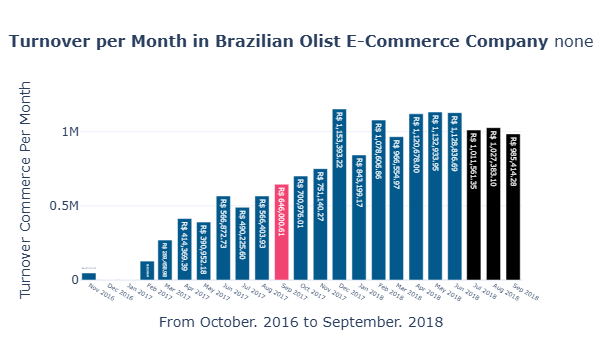

In [88]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=merged_order_payment_month.index,
        y=merged_order_payment_month["payment_value"],
        text=merged_order_payment_month["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:,.2f}",
        marker_color=colors
    )
)

fig.update_layout(
    {
        # "title":"<b>Turnover per Month in Brazilian Olist E-Ceommerce Company</b>"
        "title":{
            "text":"<b>Turnover per Month in Brazilian Olist E-Commerce Company</b> " + template,
            "x":0.5,
            "y":0.9,
            "font": {
                "size":16
            },
                },
        "xaxis": {
            "title":"From October. 2016 to September. 2018",
            "showticklabels":True,
            "dtick":"M1",
            "tickfont":{
                "size":6
            }
        },
        "yaxis": {
            "title" : "Turnover Commerce Per Month"
        },
        "template" : "plotly_white"
    }
)

fig.show()

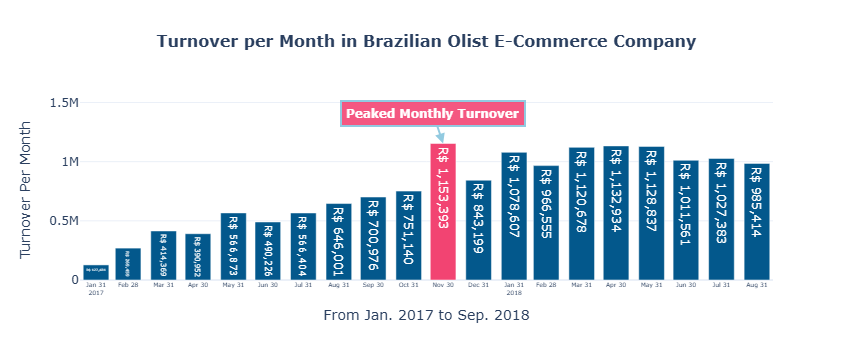

In [96]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=merged_order_payment_month_from2017.index,
        y=merged_order_payment_month_from2017["payment_value"],
        text=merged_order_payment_month_from2017["payment_value"],
        textposition="auto",
        texttemplate="R$ %{y:,.0f}",
        marker_color=colors
    )
)
fig.update_layout(
    {
        # "title": "<b>Turnover per Month in Brazilian Olist E-Commerce Company</b>"
        "title": {
            "text": "<b>Turnover per Month in Brazilian Olist E-Commerce Company</b>",
            "x": 0.5,
            "y": 0.9,
            "font": {
                "size": 16
            }
        },
        "xaxis": {
            "title": "From Jan. 2017 to Sep. 2018",
            "showticklabels": True,
            "tick0": "2017-01-31",
            "dtick": "M1",
            "tickfont": {
                "size": 6
            }
        },
        "yaxis": {
            "title": "Turnover Per Month"
        },
        "template": "plotly_white"
    }
)

fig.add_annotation(
    x="2017-11-30",
    y=1153393,
    text="<b>Peaked Monthly Turnover</b>",
    bgcolor="#f22e62",
    bordercolor="#77bdd9",
    borderwidth=2,
    borderpad=4,
    opacity=0.8,
    showarrow = True,
    arrowhead = 2,
    arrowsize = 1,
    arrowwidth = 2,
    arrowcolor = "#77bdd9",
    font=dict(color="#ffffff")
)
fig.show()

In [97]:
merged_order_payment_date_sum = merged_order_payment_date.groupby(pd.Grouper(key="order_purchase_timestamp",freq="D")).sum()

In [98]:
merged_order_payment_date_sum

payment_value
order_purchase_timestamp               
2016-10-03                       595.14
2016-10-04                      9821.42
2016-10-05                      7209.50
2016-10-06                      6733.52
2016-10-07                      7096.69
...                                 ...
2018-08-25                     11737.76
2018-08-26                      9304.00
2018-08-27                      6111.60
2018-08-28                      4121.23
2018-08-29                      1762.70

[696 rows x 1 columns]

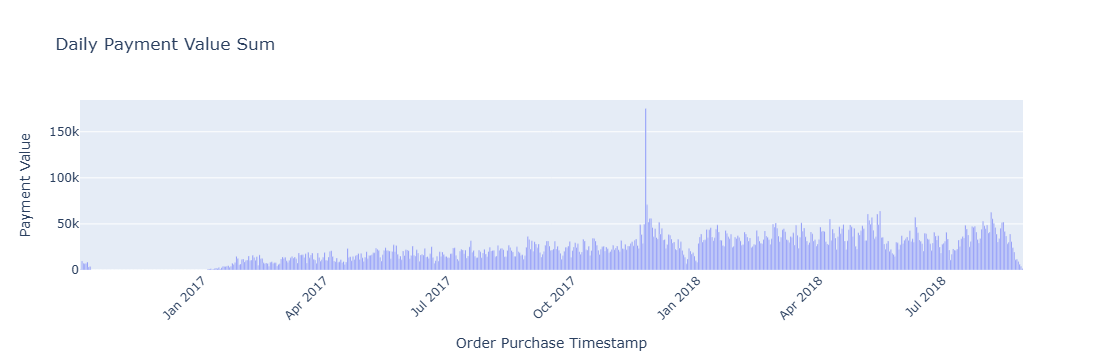

In [100]:
fig = px.bar(
    x=merged_order_payment_date_sum.index,
    y=merged_order_payment_date_sum["payment_value"],
    title = "Daily Payment Value Sum",
    labels = {
        "x":"Order Purchase Timestamp",
        "y":"Payment Value"
    }
)

fig.update_layout(
    xaxis_tickangle=-45
)

fig.show()

In [9]:
merged_order_payment_date01 = merged_order[["order_purchase_timestamp","payment_value"]].copy()

In [105]:
merged_order_payment_date01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96460 entries, 0 to 96459
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  96460 non-null  datetime64[ns]
 1   payment_value             96460 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.5 MB


In [109]:
dir(merged_order_payment_date01["order_purchase_timestamp"].dt)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__frozen',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessors',
 '_add_delegate_accessors',
 '_constructor',
 '_delegate_method',
 '_delegate_property_get',
 '_delegate_property_set',
 '_dir_additions',
 '_dir_deletions',
 '_freeze',
 '_get_values',
 '_hidden_attrs',
 '_parent',
 '_reset_cache',
 'as_unit',
 'ceil',
 'date',
 'day',
 'day_name',
 'day_of_week',
 'day_of_year',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is

In [10]:
merged_order_payment_date01["year"] = merged_order_payment_date01["order_purchase_timestamp"].dt.year
merged_order_payment_date01["month"] = merged_order_payment_date01["order_purchase_timestamp"].dt.month
merged_order_payment_date01["day"] = merged_order_payment_date01["order_purchase_timestamp"].dt.day
merged_order_payment_date01["weekday"] = merged_order_payment_date01["order_purchase_timestamp"].dt.weekday
merged_order_payment_date01["hour"] = merged_order_payment_date01["order_purchase_timestamp"].dt.hour
merged_order_payment_date01["minute"] = merged_order_payment_date01["order_purchase_timestamp"].dt.minute
merged_order_payment_date01["quarter"] = merged_order_payment_date01["order_purchase_timestamp"].dt.quarter

In [11]:
merged_order_payment_date01.head()

order_purchase_timestamp  payment_value  year  month  day  weekday  hour  \
0      2017-10-02 10:56:33          18.12  2017     10    2        0    10   
1      2017-10-02 10:56:33           2.00  2017     10    2        0    10   
2      2017-10-02 10:56:33          18.59  2017     10    2        0    10   
3      2018-07-24 20:41:37         141.46  2018      7   24        1    20   
4      2018-08-08 08:38:49         179.12  2018      8    8        2     8   

   minute  quarter  
0      56        4  
1      56        4  
2      56        4  
3      41        3  
4      38        3

In [119]:
merged_order_payment_year = merged_order_payment_date01[["year","payment_value"]].copy()

In [121]:
merged_order_payment_year = merged_order_payment_year.groupby("year").sum()

In [122]:
merged_order_payment_year

payment_value
year               
2016       47290.82
2017     6920422.83
2018     8451969.20

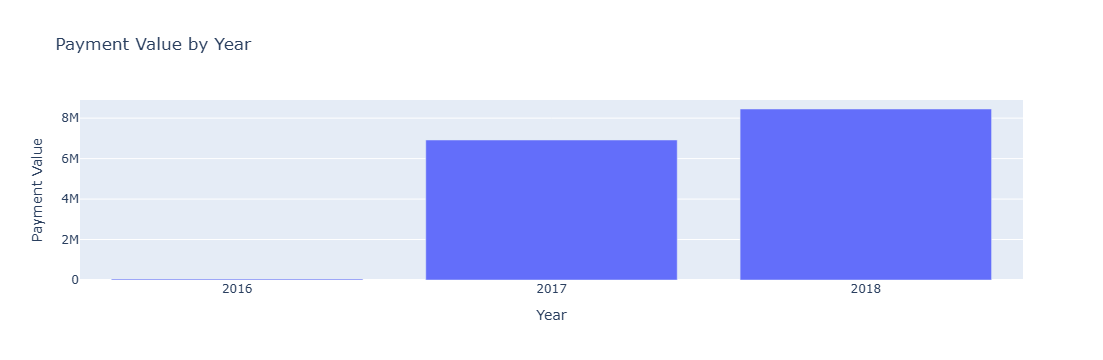

In [126]:
import plotly.express as px

fig = px.bar(
    x=merged_order_payment_year.index,
    y=merged_order_payment_year["payment_value"],
    title="Payment Value by Year",
    labels={
        "x":"Year",
        "y":"Payment Value"
    }
)

fig.update_xaxes(tickvals=[2016,2017,2018])

fig.show()

In [133]:
merged_order_payment_weekday = merged_order_payment_date01[["weekday","payment_value"]].copy()

In [129]:
merged_order_payment_weekday.head()

weekday  payment_value
0        0          38.71
1        1         141.46
2        2         179.12
3        5          72.20
4        1          28.62

In [130]:
merged_order_payment_weekday=merged_order_payment_weekday.groupby("weekday").sum()
merged_order_payment_weekday

payment_value
weekday               
0           2530671.56
1           2473930.77
2           2396215.34
3           2283849.51
4           2222421.36
5           1704949.69
6           1807644.62

In [138]:
def weekday_to_str(row) :
    if row["weekday"] == 0 :
        row["weekday"] = "Mon"
    elif row["weekday"] == 1 :
        row["weekday"] = "Tue"
    elif row["weekday"] == 2 :
        row["weekday"] = "Wed"
    elif row["weekday"] == 3 :
        row["weekday"] = "Thu"
    elif row["weekday"] == 4 :
        row["weekday"] = "Fri"
    elif row["weekday"] == 5 :
        row["weekday"] = "Sat"
    elif row["weekday"] == 6 :
        row["weekday"] = "Sun"
    return row

In [132]:
merged_order_payment_weekday.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='weekday')

In [135]:
merged_order_payment_weekday["weekday"] = merged_order_payment_weekday["weekday"].astype(object)

In [139]:
merged_order_payment_weekday = merged_order_payment_weekday.apply(weekday_to_str, axis=1)
merged_order_payment_weekday

weekday  payment_value
0         Mon          38.71
1         Tue         141.46
2         Wed         179.12
3         Sat          72.20
4         Tue          28.62
...       ...            ...
96455     Thu          85.08
96456     Tue         195.00
96457     Sun         271.01
96458     Mon         441.16
96459     Thu          86.86

[96460 rows x 2 columns]

In [140]:
merged_order_payment_weekday = merged_order_payment_weekday.groupby("weekday").sum()

In [141]:
merged_order_payment_weekday

payment_value
weekday               
Fri         2222421.36
Mon         2530671.56
Sat         1704949.69
Sun         1807644.62
Thu         2283849.51
Tue         2473930.77
Wed         2396215.34

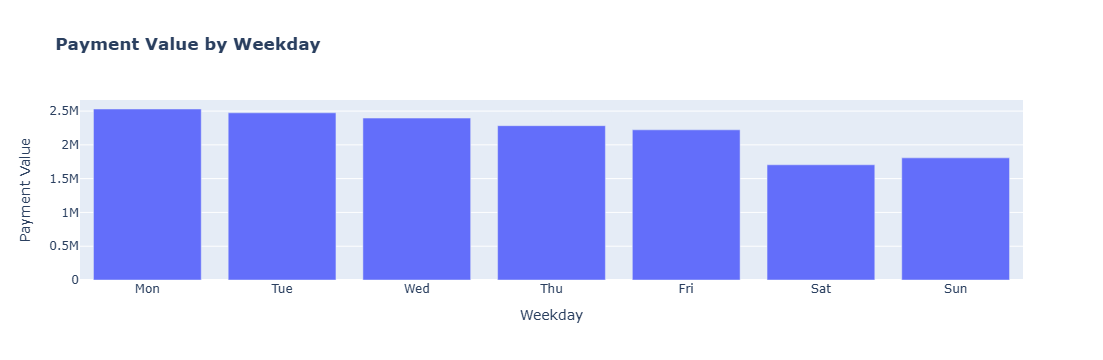

In [147]:
import plotly.express as px

fig = px.bar(
    x=merged_order_payment_weekday.index,
    y=merged_order_payment_weekday["payment_value"],
    category_orders={"x":["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]},
    title="<b>Payment Value by Weekday</b>",
    labels={"x":"Weekday","y":"Payment Value"}
)

fig.show()

In [160]:
merged_order_payment_quarter = merged_order_payment_date01[["quarter","payment_value"]].copy()

In [161]:
merged_order_payment_quarter = merged_order_payment_quarter.groupby("quarter", as_index=False).sum()

In [162]:
merged_order_payment_quarter

quarter  payment_value
0        1     3977098.94
1        2     4721382.50
2        3     3926177.93
3        4     2795023.48

In [163]:
def func(row) :
    if row["quarter"] == 1 :
        row["quarter"] = "1Q"
    elif row["quarter"] == 2 :
        row["quarter"] = "2Q"
    elif row["quarter"] == 3 :
        row["quarter"] = "3Q"
    elif row["quarter"] == 4 :
        row["quarter"] = "4Q"
    return row

In [165]:
merged_order_payment_quarter["quarter"] = merged_order_payment_quarter["quarter"].astype(object)
merged_order_payment_quarter = merged_order_payment_quarter.apply(func,axis=1)
merged_order_payment_quarter

quarter  payment_value
0      1Q     3977098.94
1      2Q     4721382.50
2      3Q     3926177.93
3      4Q     2795023.48

In [166]:
merged_order_payment_quarter = merged_order_payment_quarter.set_index("quarter")
merged_order_payment_quarter

payment_value
quarter               
1Q          3977098.94
2Q          4721382.50
3Q          3926177.93
4Q          2795023.48

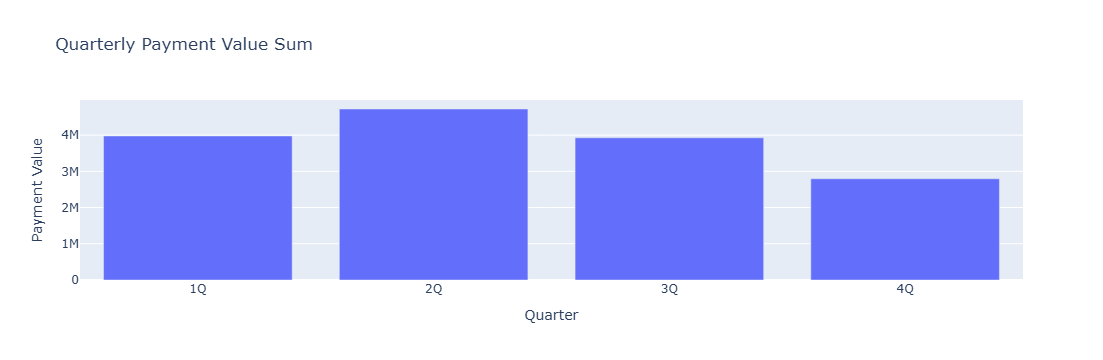

In [169]:
import plotly.express as px

fig = px.bar(
    x = merged_order_payment_quarter.index,
    y = merged_order_payment_quarter["payment_value"],
    title = "Quarterly Payment Value Sum",
    labels = {"x":"Quarter", "y": "Payment Value"}
)

fig.show()

In [170]:
merged_order_payment_hour = merged_order_payment_date01[["hour","payment_value"]].copy()

In [171]:
merged_order_payment_hour.head()

hour  payment_value
0    10          38.71
1    20         141.46
2     8         179.12
3    19          72.20
4    21          28.62

In [172]:
merged_order_payment_hour = merged_order_payment_hour.groupby("hour").sum()

In [173]:
merged_order_payment_hour

payment_value
hour               
0         360158.45
1         171441.04
2          64572.21
3          37551.29
4          28209.97
5          25620.74
6          63215.01
7         173948.18
8         452343.96
9         775133.99
10        951042.29
11        996489.76
12        949591.16
13        988925.02
14       1075114.95
15       1026385.75
16       1059317.93
17        948962.60
18        927806.90
19        931889.61
20        968274.18
21        945900.45
22        896317.68
23        601469.73

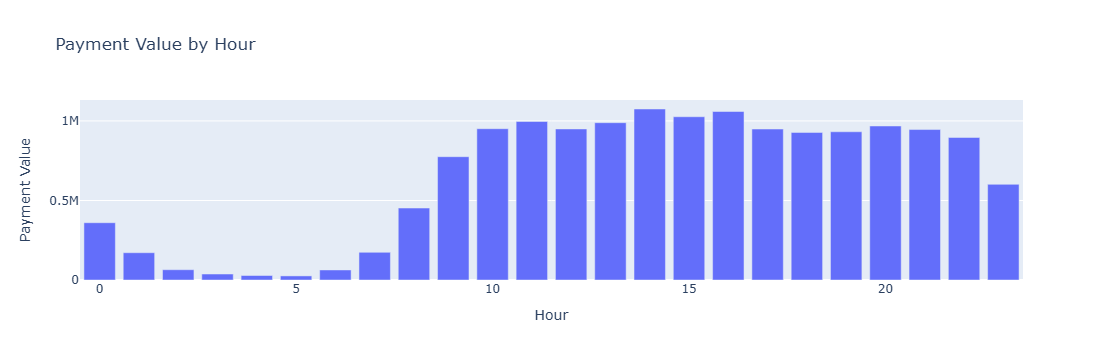

In [177]:
import plotly.express as px

fig = px.bar(
    x=merged_order_payment_hour.index,
    y=merged_order_payment_hour["payment_value"],
    title="Payment Value by Hour",
    labels={"x":"Hour","y":"Payment Value"}
)

fig.show()

In [178]:
merged_order_payment_minute = merged_order_payment_date01[["minute","payment_value"]].copy()

In [180]:
merged_order_payment_minute = merged_order_payment_minute.groupby("minute").sum()

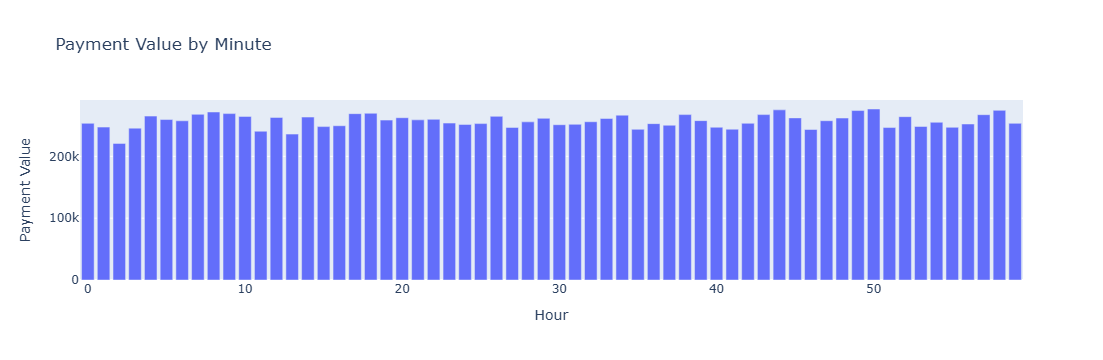

In [181]:
import plotly.express as px

fig = px.bar(
    x=merged_order_payment_minute.index,
    y=merged_order_payment_minute["payment_value"],
    title="Payment Value by Minute",
    labels={"x":"Hour","y":"Payment Value"}
)

fig.show()

In [183]:
merged_order_payment_hour_weekday = merged_order_payment_date01[["weekday","hour","payment_value"]].copy()

In [184]:
merged_order_payment_hour_weekday

weekday  hour  payment_value
0            0    10          38.71
1            1    20         141.46
2            2     8         179.12
3            5    19          72.20
4            1    21          28.62
...        ...   ...            ...
96455        3     9          85.08
96456        1    12         195.00
96457        6    14         271.01
96458        0    21         441.16
96459        3    20          86.86

[96460 rows x 3 columns]

In [186]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.groupby(["weekday","hour"]).sum()

In [187]:
merged_order_payment_hour_weekday.index[0]

(np.int32(0), np.int32(0))

In [189]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.reset_index()

In [27]:
def weekday_to_str(row) :
    if row["weekday"] == 0 :
        row["weekday"] = "Mon"
    elif row["weekday"] == 1 :
        row["weekday"] = "Tue"
    elif row["weekday"] == 2 :
        row["weekday"] = "Wed"
    elif row["weekday"] == 3 :
        row["weekday"] = "Thu"
    elif row["weekday"] == 4 :
        row["weekday"] = "Fri"
    elif row["weekday"] == 5 :
        row["weekday"] = "Sat"
    elif row["weekday"] == 6 :
        row["weekday"] = "Sun"
    return row

In [193]:
merged_order_payment_hour_weekday

weekday  hour  payment_value
0         0     0       46807.42
1         0     1       17734.77
2         0     2        7462.56
3         0     3        6442.62
4         0     4        2138.02
..      ...   ...            ...
163       6    19      140127.39
164       6    20      150543.96
165       6    21      135431.31
166       6    22      127866.74
167       6    23       82991.95

[168 rows x 3 columns]

In [195]:
merged_order_payment_hour_weekday["weekday"] = merged_order_payment_hour_weekday["weekday"].astype(object)
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.apply(weekday_to_str, axis=1)

merged_order_payment_hour_weekday


weekday  hour  payment_value
0       Mon     0       46807.42
1       Mon     1       17734.77
2       Mon     2        7462.56
3       Mon     3        6442.62
4       Mon     4        2138.02
..      ...   ...            ...
163     Sun    19      140127.39
164     Sun    20      150543.96
165     Sun    21      135431.31
166     Sun    22      127866.74
167     Sun    23       82991.95

[168 rows x 3 columns]

In [1]:
# 요일, 시간과 수익 간 상관관계

In [13]:
merged_order_payment_date01.head()

order_purchase_timestamp  payment_value  year  month  day  weekday  hour  \
0      2017-10-02 10:56:33          18.12  2017     10    2        0    10   
1      2017-10-02 10:56:33           2.00  2017     10    2        0    10   
2      2017-10-02 10:56:33          18.59  2017     10    2        0    10   
3      2018-07-24 20:41:37         141.46  2018      7   24        1    20   
4      2018-08-08 08:38:49         179.12  2018      8    8        2     8   

   minute  quarter  
0      56        4  
1      56        4  
2      56        4  
3      41        3  
4      38        3

In [55]:
merged_order_payment_hour_weekday = merged_order_payment_date01[["weekday", "hour", "payment_value"]].copy()

In [16]:
merged_order_payment_hour_weekday

weekday  hour  payment_value
0             0    10          18.12
1             0    10           2.00
2             0    10          18.59
3             1    20         141.46
4             2     8         179.12
...         ...   ...            ...
103881        3     9          85.08
103882        1    12         195.00
103883        6    14         271.01
103884        0    21         441.16
103885        3    20          86.86

[103886 rows x 3 columns]

In [56]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.groupby(["weekday","hour"]).sum()

In [50]:
merged_order_payment_hour_weekday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weekday        168 non-null    object 
 1   hour           168 non-null    int64  
 2   payment_value  168 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.1+ KB


In [57]:
merged_order_payment_hour_weekday01 = merged_order_payment_hour_weekday.reset_index()

In [58]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday01
merged_order_payment_hour_weekday.head()

weekday  hour  payment_value
0        0     0       48632.14
1        0     1       18102.83
2        0     2        8007.15
3        0     3        6848.70
4        0     4        2138.02

In [59]:
merged_order_payment_hour_weekday["weekday"] = merged_order_payment_hour_weekday["weekday"].astype(object)
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.apply(weekday_to_str, axis=1)

In [60]:
merged_order_payment_hour_weekday.head()

weekday  hour  payment_value
0     Mon     0       48632.14
1     Mon     1       18102.83
2     Mon     2        8007.15
3     Mon     3        6848.70
4     Mon     4        2138.02

In [61]:
merged_order_payment_hour_weekday["weekday"] = pd.Categorical(merged_order_payment_hour_weekday["weekday"], categories = ["Sun", "Mon","Tue","Wed","Thu","Fri","Sat"], ordered = True)

In [62]:
merged_order_payment_hour_weekday = merged_order_payment_hour_weekday.sort_values(by=["weekday","hour"],ascending=True)

In [63]:
merged_order_payment_hour_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 144 to 143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   weekday        168 non-null    category
 1   hour           168 non-null    int64   
 2   payment_value  168 non-null    float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 4.4 KB


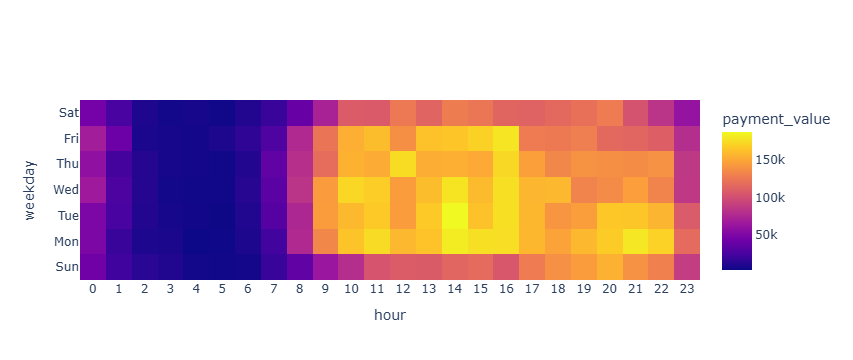

In [64]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x=merged_order_payment_hour_weekday["hour"],
        y=merged_order_payment_hour_weekday["weekday"],
        z=merged_order_payment_hour_weekday["payment_value"],
        colorbar={
            "title":"payment_value"
        }
    )
)
fig.update_layout({
    "xaxis":{
        "title":"hour",
        "showticklabels":True,
        "dtick":1
    },
    "yaxis":{
        "title":"weekday",
        "showticklabels":True
    }
})
fig.show()

In [65]:
# 피어슨 상관계수 => 상관관계 관련 데이터 차트를 생성!

In [66]:
doc = pd.read_csv("COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding="utf-8-sig")

In [67]:
doc

FIPS     Admin2    Province_State  Country_Region  \
0     45001.0  Abbeville    South Carolina              US   
1     22001.0     Acadia         Louisiana              US   
2     51001.0   Accomack          Virginia              US   
3     16001.0        Ada             Idaho              US   
4     19001.0      Adair              Iowa              US   
...       ...        ...               ...             ...   
2517  82604.0        NaN             Wales  United Kingdom   
2518      NaN        NaN               NaN           Nauru   
2519      NaN        NaN              Niue     New Zealand   
2520      NaN        NaN               NaN          Tuvalu   
2521      NaN        NaN  Pitcairn Islands  United Kingdom   

              Last_Update        Lat       Long_  Confirmed  Deaths  \
0     2020-04-01 21:58:49  34.223334  -82.461707          4       0   
1     2020-04-01 21:58:49  30.295065  -92.414197         47       1   
2     2020-04-01 21:58:49  37.767072  -75.632346          7       0   
3     2020-04-01 21:58:49  43.452658 -116.241552        195       3   
4     2020-04-01 21:58:49  41.330756  -94.471059          1       0   
...                   ...        ...         ...        ...     ...   
2517  2020-04-01 21:58:49  52.130700   -3.783700          0     198   
2518  2020-04-01 21:58:49  -0.522800  166.931500          0       0   
2519  2020-04-01 21:58:49 -19.054400 -169.867200          0       0   
2520  2020-04-01 21:58:49  -7.109500  177.649300          0       0   
2521  2020-04-01 21:58:49 -24.376800 -128.324200          0       0   

      Recovered  Active                      Combined_Key  
0             0       4     Abbeville, South Carolina, US  
1             0      46             Acadia, Louisiana, US  
2             0       7            Accomack, Virginia, US  
3             0     192                    Ada, Idaho, US  
4             0       1                   Adair, Iowa, US  
...         ...     ...                               ...  
2517          0       0             Wales, United Kingdom  
2518          0       0                             Nauru  
2519          0       0                 Niue, New Zealand  
2520          0       0                            Tuvalu  
2521          0       0  Pitcairn Islands, United Kingdom  

[2522 rows x 12 columns]

In [73]:
doc2 = doc.corr(numeric_only=True)
doc2

FIPS       Lat     Long_  Confirmed    Deaths  Recovered  \
FIPS       1.000000  0.160717  0.171490  -0.000504  0.076467        NaN   
Lat        0.160717  1.000000 -0.476426   0.029389  0.026309  -0.002781   
Long_      0.171490 -0.476426  1.000000   0.141126  0.096924   0.141932   
Confirmed -0.000504  0.029389  0.141126   1.000000  0.837153   0.727305   
Deaths     0.076467  0.026309  0.096924   0.837153  1.000000   0.546858   
Recovered       NaN -0.002781  0.141932   0.727305  0.546858   1.000000   
Active     0.002718  0.035631  0.119737   0.942484  0.796549   0.462484   

             Active  
FIPS       0.002718  
Lat        0.035631  
Long_      0.119737  
Confirmed  0.942484  
Deaths     0.796549  
Recovered  0.462484  
Active     1.000000

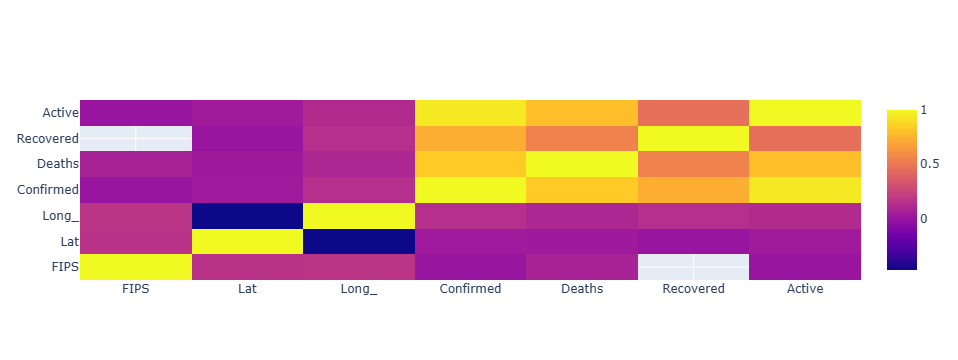

In [74]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x=doc2.columns,
        y=doc2.index,
        z=doc2.values
    )
)

fig.show()

In [77]:
pivot_df = merged_order_payment_hour_weekday.pivot(index="weekday", columns = "hour", values = "payment_value")

In [78]:
pivot_df

hour           0         1         2        3        4        5         6   \
weekday                                                                      
Sun      42231.35  20820.00  12150.76  9457.71  3914.48  3605.57   4864.46   
Mon      48632.14  18102.83   8007.15  6848.70  2138.02  2915.84   7554.34   
Tue      48207.45  24007.65   9872.94  5766.02  4261.12  2484.91   9440.90   
Wed      65396.56  25958.21  10306.86  4443.78  3377.50  3150.76  11705.25   
Thu      57775.64  22298.39  10521.75  5400.55  4530.63  3153.73   9907.60   
Fri      67820.51  40519.12   7060.85  5663.93  5142.38  7655.93  14329.31   
Sat      44366.22  24262.22   8286.66  4333.35  5219.08  3249.49   9882.51   

hour           7         8          9   ...         14         15         16  \
weekday                                 ...                                    
Sun      17854.90  35273.52   62963.56  ...  113753.53  117506.49  105179.57   
Mon      21839.84  75728.33  133717.71  ...  182390.45  176517.74  175954.63   
Tue      30433.23  74394.34  145074.68  ...  187921.29  162929.88  176443.45   
Wed      32359.82  83027.23  144428.34  ...  178486.39  159620.54  177156.97   
Thu      35456.98  80435.31  118814.50  ...  154372.37  152104.33  172923.66   
Fri      27021.58  75925.85  123502.10  ...  165045.47  170390.53  179266.15   
Sat      17641.24  38388.34   71381.07  ...  127808.48  123946.27  113616.00   

hour            17         18         19         20         21         22  \
weekday                                                                     
Sun      127328.17  138275.70  144943.88  155117.41  139557.62  130346.29   
Mon      158050.35  147894.01  158628.50  167668.44  179942.31  170609.01   
Tue      158300.41  141374.54  145684.83  166249.21  165564.83  156997.21   
Wed      157780.54  158587.74  131257.76  136209.90  146214.68  131370.59   
Thu      146707.76  133651.30  139903.51  138105.63  136447.33  139419.93   
Fri      127291.37  125846.93  128446.29  116164.52  114083.69  110082.41   
Sat      112367.62  116046.39  120610.35  127248.24  102593.72   82841.84   

hour            23  
weekday             
Sun       88475.78  
Mon      117355.51  
Tue      107477.77  
Wed       85202.43  
Thu       85846.51  
Fri       78736.50  
Sat       60263.32  

[7 rows x 24 columns]

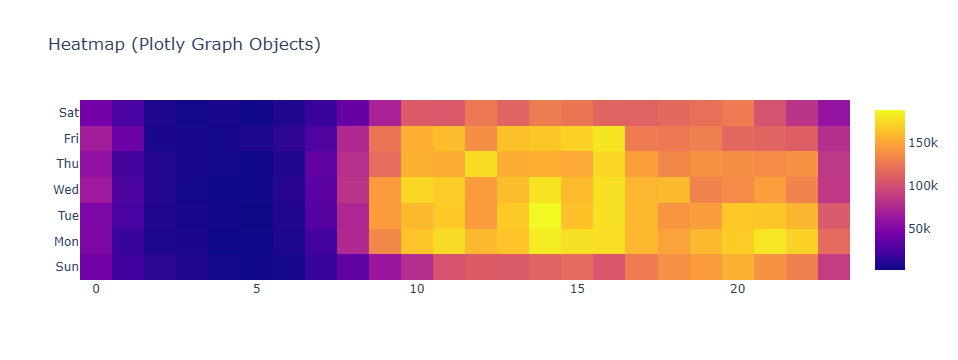

In [80]:
import plotly.graph_objects as go

fig = go.Figure(
    go.Heatmap(
        x = pivot_df.columns,
        y = pivot_df.index,
        z = pivot_df.values
    )
)

fig.update_layout(
    title={
        "text":"Heatmap (Plotly Graph Objects)"
    }
)

fig.show()

In [81]:
# 어떤 카테고리가 가장 매출이 많은지!

In [82]:
category_name

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [83]:
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [84]:
payments

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [85]:
products_category = pd.merge(products, category_name, on="product_category_name")

In [86]:
products_category

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32323  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32324  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32325  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32326  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32327  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32323                 45.0                        67.0                 2.0   
32324                 41.0                       971.0                 1.0   
32325                 50.0                       799.0                 1.0   
32326                 60.0                       156.0                 2.0   
32327                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32323           12300.0               40.0               40.0   
32324            1700.0               16.0               19.0   
32325            1400.0               27.0                7.0   
32326             700.0               31.0               13.0   
32327            2083.0               12.0                2.0   

       product_width_cm product_category_name_english  
0                  14.0                     perfumery  
1                  20.0                           art  
2                  15.0                sports_leisure  
3                  26.0                          baby  
4                  13.0                    housewares  
...                 ...                           ...  
32323              40.0               furniture_decor  
32324              16.0     construction_tools_lights  
32325              27.0                bed_bath_table  
32326              20.0         computers_accessories  
32327               7.0                bed_bath_table  

[32328 rows x 10 columns]

In [87]:
products_category_only = products_category[["product_id", "product_category_name_english"]]

In [88]:
products_category_only

product_id product_category_name_english
0      1e9e8ef04dbcff4541ed26657ea517e5                     perfumery
1      3aa071139cb16b67ca9e5dea641aaa2f                           art
2      96bd76ec8810374ed1b65e291975717f                sports_leisure
3      cef67bcfe19066a932b7673e239eb23d                          baby
4      9dc1a7de274444849c219cff195d0b71                    housewares
...                                 ...                           ...
32323  a0b7d5a992ccda646f2d34e418fff5a0               furniture_decor
32324  bf4538d88321d0fd4412a93c974510e6     construction_tools_lights
32325  9a7c6041fa9592d9d9ef6cfe62a71f8c                bed_bath_table
32326  83808703fc0706a22e264b9d75f04a2e         computers_accessories
32327  106392145fca363410d287a815be6de4                bed_bath_table

[32328 rows x 2 columns]

In [89]:
products_category_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32328 non-null  object
 1   product_category_name_english  32328 non-null  object
dtypes: object(2)
memory usage: 505.3+ KB


In [91]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [92]:
products_category_order = pd.merge(products_category_only, order_items, on="product_id")

In [94]:
products_category_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111023 entries, 0 to 111022
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_id                     111023 non-null  object 
 1   product_category_name_english  111023 non-null  object 
 2   order_id                       111023 non-null  object 
 3   order_item_id                  111023 non-null  int64  
 4   seller_id                      111023 non-null  object 
 5   shipping_limit_date            111023 non-null  object 
 6   price                          111023 non-null  float64
 7   freight_value                  111023 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 6.8+ MB


In [95]:
# 커스터마이징 할  수 있는 집계함수 사용 가능! => 그룹바이 + 집계함수 -> 모든 컬럼이 동일한 집계

df = pd.DataFrame({
    "미국":[2.1,2.2,2.3],
    "한국":[0.4,0.5,0.45],
    "중국":[10,13,15]
})

df

미국    한국  중국
0  2.1  0.40  10
1  2.2  0.50  13
2  2.3  0.45  15

In [96]:
df.aggregate(["sum","min"]) # sum, min, max, std, count

미국    한국  중국
sum  6.6  1.35  38
min  2.1  0.40  10

In [97]:
df.agg({"미국": "count", "한국": "sum"})

미국    3.00
한국    1.35
dtype: float64

In [98]:
df.agg(["mean"])

미국    한국         중국
mean  2.2  0.45  12.666667

In [99]:
df.agg(["mean"], axis = "columns")

mean
0  4.166667
1  5.233333
2  5.916667

In [100]:
df = pd.DataFrame({
    "년도": [2000, 2010, 2020, 2000, 2000, 2000],
    "미국": [2.1, 2.2, 2.3, 3.1, 4.1, 5.1],
    "한국": [0.4, 0.5, 0.45, 0.7, 0.9, 1.2],
    "중국": [10, 13, 15, 12, 45, 56]
})

df

년도   미국    한국  중국
0  2000  2.1  0.40  10
1  2010  2.2  0.50  13
2  2020  2.3  0.45  15
3  2000  3.1  0.70  12
4  2000  4.1  0.90  45
5  2000  5.1  1.20  56

In [101]:
df.groupby("년도").sum()

미국    한국   중국
년도                   
2000  14.4  3.20  123
2010   2.2  0.50   13
2020   2.3  0.45   15

In [102]:
df.groupby("년도").agg({"미국": "sum", "한국": "mean"})

미국    한국
년도              
2000  14.4  0.80
2010   2.2  0.50
2020   2.3  0.45

In [106]:
products_category_order = products_category_order.groupby("product_category_name_english").agg({"order_id": "count"}).rename(columns={"order_id":"order_count"})

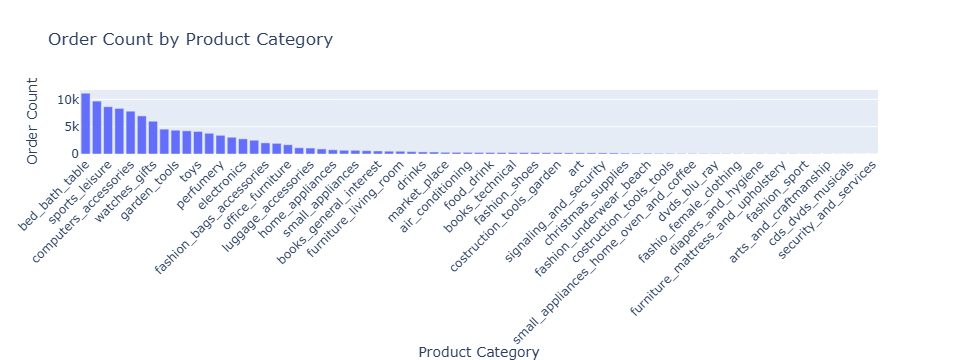

In [111]:
import plotly.express as px

fig = px.bar(
    x=products_category_order.index,
    y=products_category_order["order_count"],
    title = "Order Count by Product Category",
    labels = {
        "x":"Product Category",
        "y":"Order Count"
    }
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [109]:
products_category_order = products_category_order.sort_values(by="order_count", ascending=False)

In [112]:
products_category_order.head()

order_count
product_category_name_english             
bed_bath_table                       11115
health_beauty                         9670
sports_leisure                        8641
furniture_decor                       8334
computers_accessories                 7827

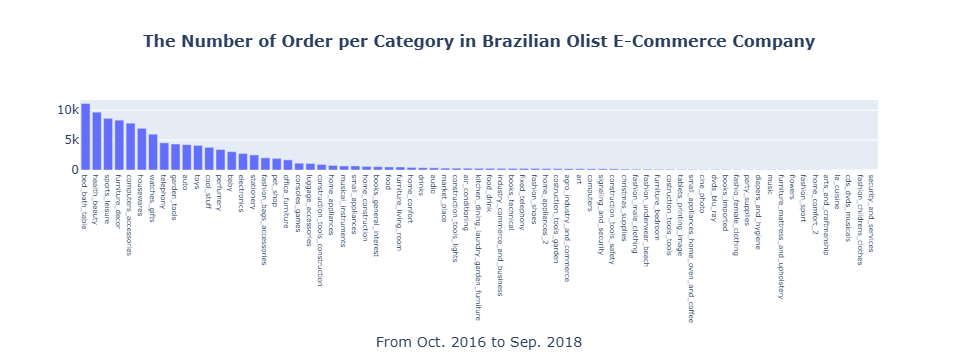

In [115]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=products_category_order.index,
        y=products_category_order["order_count"]
    )
)

fig.update_layout(
    {
        "title":{
            "text":"<b>The Number of Order per Category in Brazilian Olist E-Commerce Company</b>",
            "x":0.5,
            "y":0.9,
            "font":{
                "size":16
            }
        },
        "xaxis":{
            "title":"From Oct. 2016 to Sep. 2018",
            "showticklabels": True,
            "tickfont": {
                "size": 7
            }
        }
    }
)

fig.show()

In [116]:
products_category_order = products_category_order[products_category_order["order_count"] > 1000]

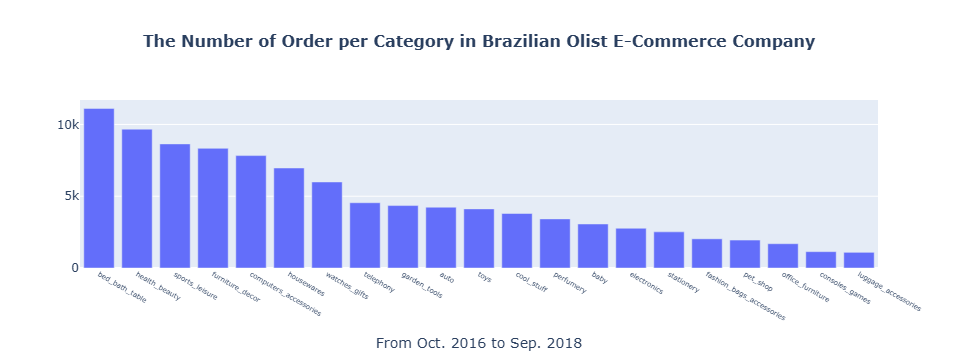

In [117]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=products_category_order.index,
        y=products_category_order["order_count"]
    )
)

fig.update_layout(
    {
        "title":{
            "text":"<b>The Number of Order per Category in Brazilian Olist E-Commerce Company</b>",
            "x":0.5,
            "y":0.9,
            "font":{
                "size":16
            }
        },
        "xaxis":{
            "title":"From Oct. 2016 to Sep. 2018",
            "showticklabels": True,
            "tickfont": {
                "size": 7
            }
        }
    }
)

fig.show()

1. 얼마나 많은 고객을 확보하고 있는가?
2. 고객들이 어디에 주로 거주하고 있는가?
3. 고객은 주로 어떤 결제방법을 사용하고 있는가?
4. 평균거래액은 얼마나 되는가?
5. 일별, 주별, 월별 판매 트렌드는 어떻게 되는가?
6. 어떤 카테고리가 인기가 있을까?
7. 평균배송시간은 얼마나 될까?

In [120]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [119]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [121]:
orders = orders.dropna()

In [122]:
orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [ ]:
orders["delivery_time"] = pd.to_datetime(orders["order_delivered_customer_date"]) - pd.to_datetime(orders["order_purchase_timestamp"])

In [123]:
orders_new = orders.copy()

In [126]:
orders_new

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date    delivery_time  
0               2017-10-18 00:00:00  8 days 10:28:40  
1               2018-08-13 00:00:00 13 days 18:46:08  
2               2018-09-04 00:00:00  9 days 09:27:40  
3               2017-12-15 00:00:00 13 days 05:00:36  
4               2018-02-26 00:00:00  2 days 20:58:23  
...                             ...              ...  
99436           2017-03-28 00:00:00  8 days 05:13:56  
99437           2018-03-02 00:00:00 22 days 04:38:58  
99438           2017-09-27 00:00:00 24 days 20:37:34  
99439           2018-02-15 00:00:00 17 days 02:04:27  
99440           2018-04-03 00:00:00  7 days 16:11:00  

[96461 rows x 9 columns]

In [125]:
orders_new["delivery_time"] = pd.to_datetime(orders_new["order_delivered_customer_date"]) - pd.to_datetime(orders_new["order_purchase_timestamp"])

In [127]:
orders_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       96461 non-null  object         
 1   customer_id                    96461 non-null  object         
 2   order_status                   96461 non-null  object         
 3   order_purchase_timestamp       96461 non-null  object         
 4   order_approved_at              96461 non-null  object         
 5   order_delivered_carrier_date   96461 non-null  object         
 6   order_delivered_customer_date  96461 non-null  object         
 7   order_estimated_delivery_date  96461 non-null  object         
 8   delivery_time                  96461 non-null  timedelta64[ns]
dtypes: object(8), timedelta64[ns](1)
memory usage: 7.4+ MB


In [129]:
orders_new["delivery_time"].describe()

count                         96461
mean     12 days 13:23:46.585853350
std       9 days 13:06:45.121880865
min                 0 days 12:48:07
25%                 6 days 18:22:50
50%                10 days 05:11:29
75%                15 days 17:17:10
max               209 days 15:05:12
Name: delivery_time, dtype: object

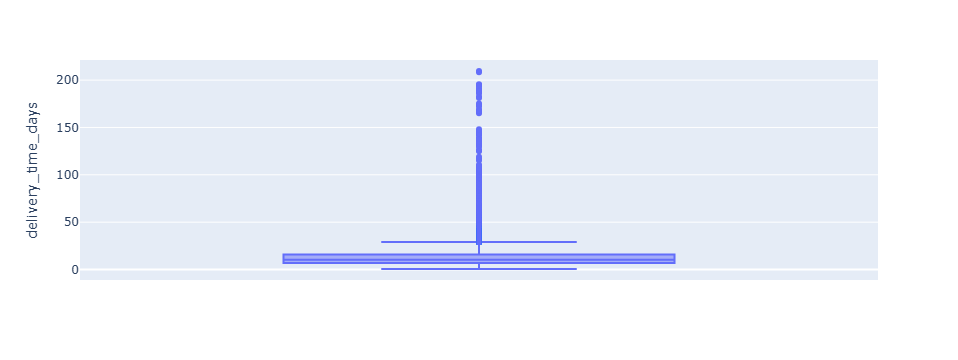

In [132]:
import plotly.express as px

orders_new["delivery_time_days"] = orders_new["delivery_time"].dt.total_seconds() / 86400

fig = px.box(
    orders_new,
    y="delivery_time_days"
)

fig.show()

In [133]:
# quantile() : 특정 데이터 내 원하는 값만 쪼개서 확인할 수 있도록 도와주는 함수

delivery_time_q95 = orders_new["delivery_time"].quantile(0.95)

In [135]:
delivery_time_q95

Timedelta('29 days 06:36:33')

In [136]:
delivery_time_q90 = orders_new["delivery_time"].quantile(0.90)

In [137]:
delivery_time_q90

Timedelta('23 days 02:21:07')

In [138]:
orders_new = orders_new[orders_new["delivery_time"] < delivery_time_q95]

In [146]:
orders_date = orders_new[["order_purchase_timestamp","delivery_time"]].copy()
orders_date["order_purchase_timestamp"] = pd.to_datetime(orders_date["order_purchase_timestamp"], format = "%Y-%m-%d %H:%M:%S")
orders_date["delivery_time"] = orders_date["delivery_time"].dt.total_seconds()
orders_date = orders_date.set_index("order_purchase_timestamp")

In [141]:
orders_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91637 entries, 0 to 99440
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   order_purchase_timestamp  91637 non-null  object         
 1   delivery_time             91637 non-null  timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 2.1+ MB


In [147]:
orders_date.head()

delivery_time
order_purchase_timestamp               
2017-10-02 10:56:33            728920.0
2018-07-24 20:41:37           1190768.0
2018-08-08 08:38:49            811660.0
2017-11-18 19:28:06           1141236.0
2018-02-13 21:18:39            248303.0

In [148]:
orders_date = orders_date.groupby(pd.Grouper(freq="ME")).mean()

In [ ]:
# 지수표기법 : 부동소수점을 가지고 있는 실수자료형에서 많이 사용하는 표기법
# 1.234567891234567897/89*74564563156 (*정수부 > 실수부)
# 숫자 비교, 크기 => 정수부 > 실수부
# 제곱 => 밑/지수 2^3

# 부호부 (1비트) x 값 (55비트) x 지수부 (8비트)

In [151]:
orders_date["delivery_time"] = orders_date["delivery_time"] / 86400

In [152]:
orders_date.head()

delivery_time
order_purchase_timestamp               
2016-10-31                    14.969742
2016-11-30                          NaN
2016-12-31                     4.693021
2017-01-31                    11.052953
2017-02-28                    11.699220

In [160]:
orders_date = orders_date.dropna()

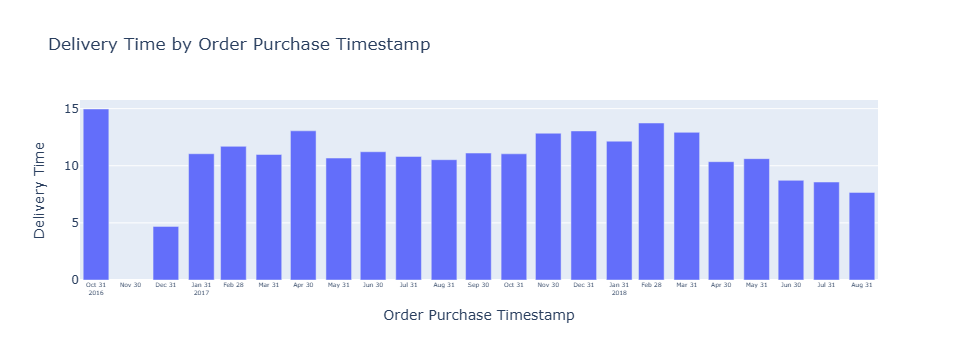

In [161]:
import plotly.express as px

fig = px.bar(
    x=orders_date.index,
    y=orders_date["delivery_time"],
    title = "Delivery Time by Order Purchase Timestamp",
    labels = {
        "x": "Order Purchase Timestamp",
        "y": "Delivery Time"
    }
)

fig.update_layout(
    xaxis={
        "showticklabels": True,
        "dtick": "M1",
        "tick0": "2017-01-31",
        "tickfont": {
            "size": 6
        }
    }
)

fig.show()

In [162]:
colors = ["#1b80bf"]*len(orders_date.index)
for index in range(15, len(orders_date.index)) :
    colors[index] = "#bf2c47"

In [163]:
colors

['#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#1b80bf',
 '#bf2c47',
 '#bf2c47',
 '#bf2c47',
 '#bf2c47',
 '#bf2c47',
 '#bf2c47',
 '#bf2c47']

In [ ]:
import plotly.express as px

fig = px.bar(
    x=orders_date.index,
    y=orders_date["delivery_time"],
    title = "Delivery Time by Order Purchase Timestamp",
    labels = {
        "x": "Order Purchase Timestamp",
        "y": "Delivery Time"
    }
)

fig.update_layout(
    xaxis={
        "showticklabels": True,
        "dtick": "M1",
        "tick0": "2017-01-31",
        "tickfont": {
            "size": 6
        }
    }
)

fig.show()

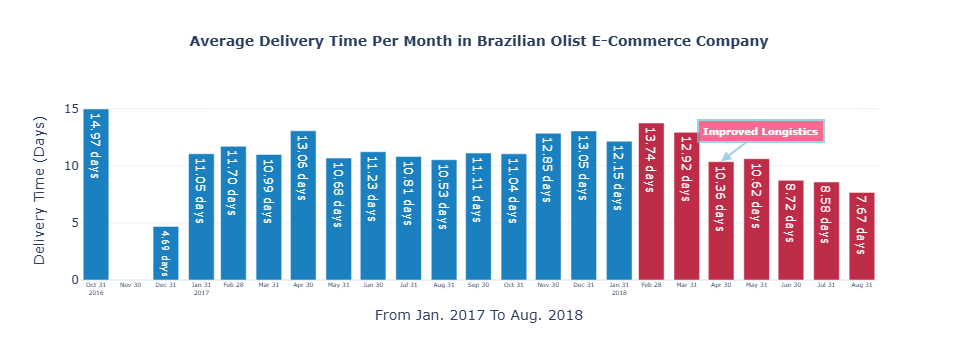

In [171]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=orders_date.index,
        y=orders_date["delivery_time"],
        text = orders_date["delivery_time"],
        texttemplate = "%{text:,.2f} days",
        marker_color=colors
    )
)

fig.update_layout(
    {
        "title": {
            "text": "<b>Average Delivery Time Per Month in Brazilian Olist E-Commerce Company</b>",
            "x":0.5,
            "y":0.9,
            "font": {
                "size": 14
            }
        },
        "xaxis": {
            "title": "From Jan. 2017 To Aug. 2018",
            "showticklabels": True,
            "tick0" : "2017-01-31",
            "dtick": "M1",
            "tickfont": {
                "size": 6
            }
        },
        "yaxis": {
            "title": "Delivery Time (Days)"
        },
        "template": "plotly_white"
    }
)

fig.add_annotation(
    x="2018-04-30",
    y=10.4,
    text="<b>Improved Longistics</b>",
    showarrow=True,
    font={
        "size":10,
        "color":"#fff"
    },
    align="center",
    arrowhead=2,
    arrowwidth=2,
    arrowsize=1,
    arrowcolor="#77bdd9",
    bordercolor="#77bdd9",
    borderwidth=2,
    borderpad=4,
    bgcolor="#f22e62",
    ax=40,
    opacity=0.7
)

fig.show()